# Plot curves for some specific sera

In [1]:
import pickle
import pandas as pd
import neutcurve
import numpy as np
import altair as alt

In [2]:
print(neutcurve.__version__)

2.1.0


Get variables passed by `snakemake`:

In [19]:
curvefits_pickle = snakemake.input.curvefits_pickle
#curvefits_pickle ='results/aggregated_titers/curvefits_DRIVE.pickle'
plot_pdf = snakemake.output.plot_pdf
ngsneuttiters = pd.read_csv("results/aggregated_titers/titers_DRIVE.csv")

Read the `neutcurve.CurveFits` for all the fits from the pickle file:

In [20]:
print(f"Reading `CurveFits` from {curvefits_pickle=}")

with open(curvefits_pickle, "rb") as f:
    fits_seqbasedneut = pickle.load(f)

Reading `CurveFits` from curvefits_pickle='results/aggregated_titers/curvefits_DRIVE.pickle'


Read in the data from the GFP based neutralization assay

In [21]:
pooledsera_datafile = './traditional_neutralization_assay_validations/231122_passagedvirus_D10066D10175D10366D10378_fracinfectivity.csv'
data = pd.read_csv(pooledsera_datafile)
data = data.replace('HI19','A/Hawaii/70/2019')
data = data.replace('Eng22','A/England/220200318/2022')
data = data.replace('WI19',"A/Wisconsin/588/2019")
data

serum  concentration  replicate                     virus  \
0      D10066_day0       0.016667          1          A/Hawaii/70/2019   
1      D10066_day0       0.005556          1          A/Hawaii/70/2019   
2      D10066_day0       0.001852          1          A/Hawaii/70/2019   
3      D10066_day0       0.000617          1          A/Hawaii/70/2019   
4      D10066_day0       0.000206          1          A/Hawaii/70/2019   
..             ...            ...        ...                       ...   
379  D10378_day182       0.000617          2  A/England/220200318/2022   
380  D10378_day182       0.000206          2  A/England/220200318/2022   
381  D10378_day182       0.000069          2  A/England/220200318/2022   
382  D10378_day182       0.000023          2  A/England/220200318/2022   
383  D10378_day182       0.000008          2  A/England/220200318/2022   

     fraction infectivity  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0                1.085642         NaN         NaN         NaN         NaN   
1                1.321345         NaN         NaN         NaN         NaN   
2                1.213689         NaN         NaN         NaN         NaN   
3                1.212344         NaN         NaN         NaN         NaN   
4                0.988708         NaN         NaN         NaN         NaN   
..                    ...         ...         ...         ...         ...   
379              0.953999         NaN         NaN         NaN         NaN   
380              1.113009         NaN         NaN         NaN         NaN   
381              1.142425         NaN         NaN         NaN         NaN   
382              0.902121         NaN         NaN         NaN         NaN   
383              0.777128         NaN         NaN         NaN         NaN   

     Unnamed: 9  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
379         NaN  
380         NaN  
381         NaN  
382         NaN  
383         NaN  

[384 rows x 10 columns]

In [22]:
data['fraction infectivity'] = np.where(data['fraction infectivity']>1,1,data['fraction infectivity'])
data['replicate'] = "replicate"+data['replicate'].astype(str)

In [23]:
serumnames = data['serum'].tolist()
mapped_names = {}
mapped_days = {}
for i in serumnames:
    indiv = i[0:6]
    day= i[7:]
    rename = indiv
    mapped_names[i] = rename
    mapped_days[i]=day
data['individual'] = data['serum'].map(mapped_names)
data['day'] = data['serum'].map(mapped_days)

In [24]:
fits_traditionalneut = neutcurve.CurveFits(data, fixtop=False)
fits_traditionalneut.sera

['D10066_day0',
 'D10066_day182',
 'D10175_day0',
 'D10175_day182',
 'D10366_day0',
 'D10366_day182',
 'D10378_day0',
 'D10378_day182']

Plot curves for specific sera and viruses of interest (note that there are **tons** of curves in `fits` so we would not want to plot them all):

/fh/fast/bloom_j/computational_notebooks/aloes/2024/flu_seqneut_DRIVE_2021-22_repeat_vax/.snakemake/conda/014bd9b36c34fcb424454141f9c8f5d9_/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


Saving to plot_pdf='results/plots_for_paper/plot_specific_sera/curves.pdf'


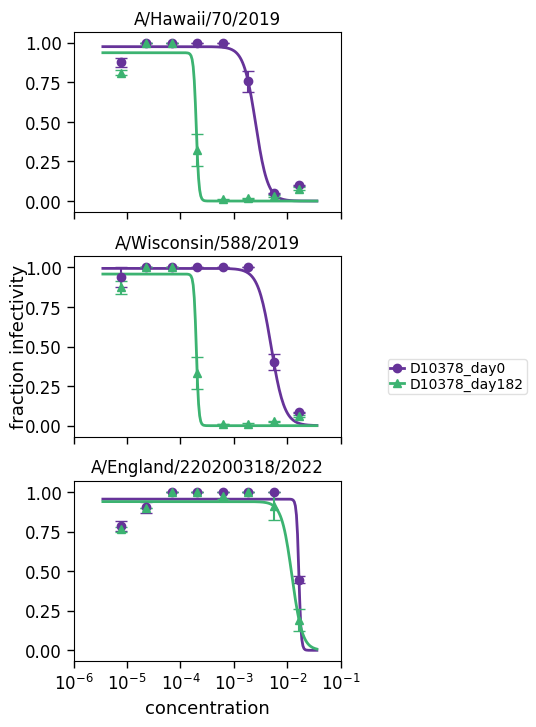

In [25]:
fig, ax = fits_traditionalneut.plotViruses(
    sera=[
 'D10378_day0',
 'D10378_day182'],
    viruses=["A/Hawaii/70/2019", "A/Wisconsin/588/2019","A/England/220200318/2022"],
    ncol=1,
    attempt_shared_legend=True,
    titlesize=12,
    labelsize=13,
    ticksize=12,
    max_sera_per_subplot=8,
#    colors=['#999999', '#009E73'],
    colors=['rebeccapurple','mediumseagreen'],
    legendfontsize=10,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1.1,
    heightscale=1,
    linewidth=2
)

print(f"Saving to {plot_pdf=}")
fig.savefig("results/plots_for_paper/Fig4_curves_GFP.svg")

Saving to plot_pdf='results/plots_for_paper/plot_specific_sera/curves.pdf'


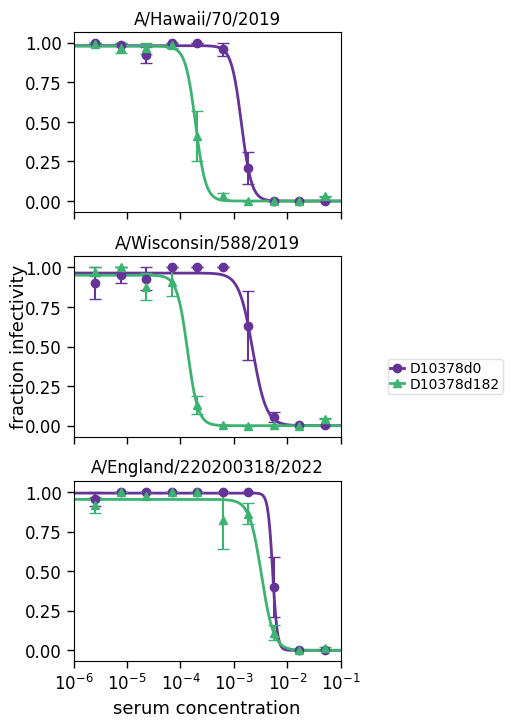

In [28]:
fig, ax = fits_seqbasedneut.plotViruses(
    sera=[
 'D10378d0',
 'D10378d182'],
    viruses=["A/Hawaii/70/2019", "A/Wisconsin/588/2019","A/England/220200318/2022"],
    ncol=1,
    attempt_shared_legend=True,
    titlesize=12,
    labelsize=13,
    ticksize=12,
    max_sera_per_subplot=8,
#    colors=['#999999', '#009E73'],
    colors=['rebeccapurple','mediumseagreen'],
    legendfontsize=10,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1.1,
    heightscale=1,
    linewidth=2
)

print(f"Saving to {plot_pdf=}")
fig.savefig("results/plots_for_paper/Fig4_curves_NGS.svg")

Saving to plot_pdf='results/plots_for_paper/plot_specific_sera/curves.pdf'
Saving to plot_pdf='results/plots_for_paper/plot_specific_sera/curves.pdf'


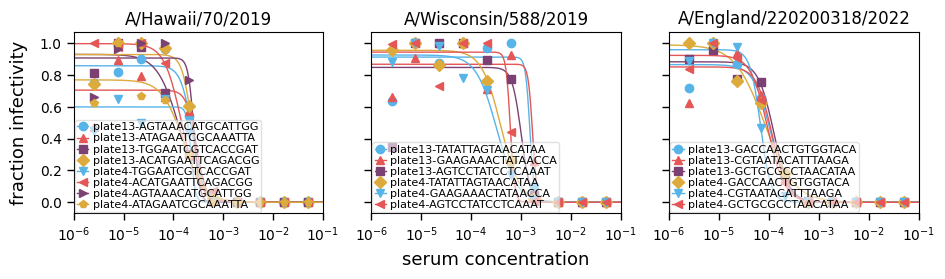

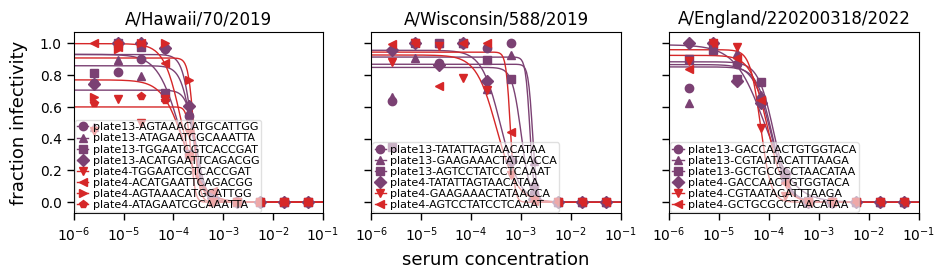

In [29]:
 fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10191d30"],
    viruses=["A/Hawaii/70/2019","A/Wisconsin/588/2019","A/England/220200318/2022"],
    ncol=3,
    attempt_shared_legend=False,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    colors=['#56B4E9', '#e45756','#7b4173',"#DDAA3C"],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1,
    subplot_titles = "{virus}"
)

print(f"Saving to {plot_pdf=}")
fig.savefig(plot_pdf)

 fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10191d30"],
    viruses=["A/Hawaii/70/2019","A/Wisconsin/588/2019","A/England/220200318/2022"],
    ncol=3,
    attempt_shared_legend=False,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    colors=['#7b4173','#7b4173','#7b4173','#7b4173','#d62728','#d62728','#d62728','#d62728'],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1,
    subplot_titles = "{virus}"
)

print(f"Saving to {plot_pdf=}")
fig.savefig(plot_pdf)



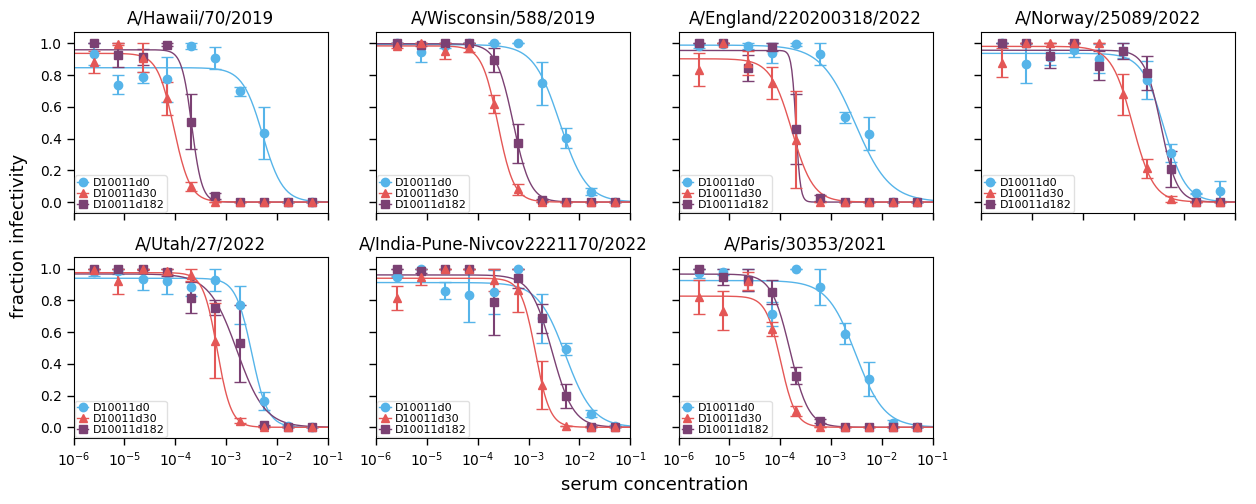

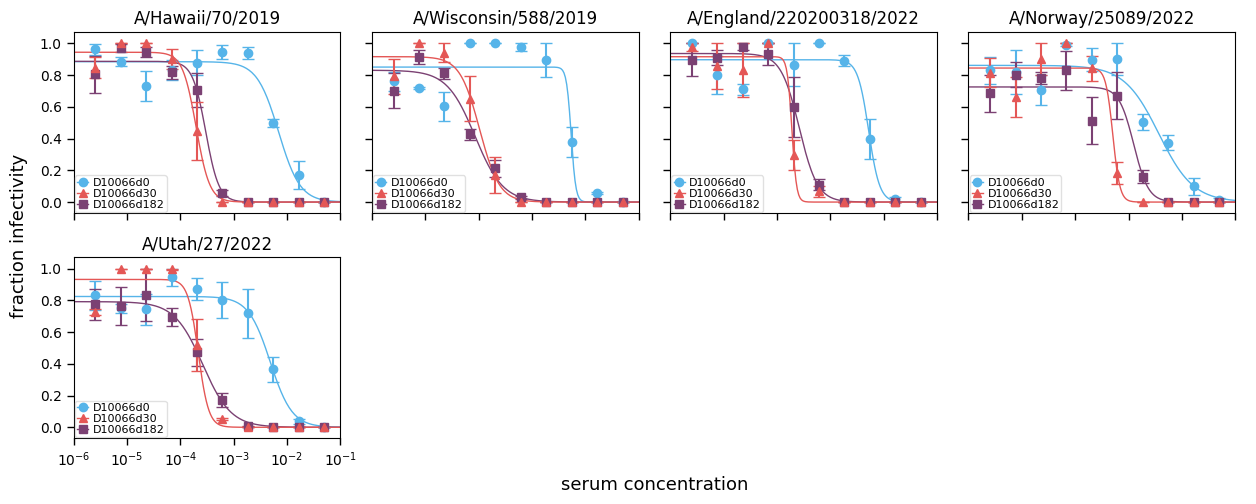

In [30]:
 fig, ax = fits_seqbasedneut.plotViruses(
    sera=["D10011d0","D10011d30","D10011d182"],
    viruses=["A/Hawaii/70/2019","A/Wisconsin/588/2019","A/England/220200318/2022","A/Norway/25089/2022","A/Utah/27/2022",'A/India-Pune-Nivcov2221170/2022','A/Paris/30353/2021',],
    ncol=4,
    attempt_shared_legend=False,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    colors=['#56B4E9', '#e45756','#7b4173',"#DDAA3C"],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1
)

 fig, ax = fits_seqbasedneut.plotViruses(
    sera=["D10066d0","D10066d30","D10066d182"],
    viruses=["A/Hawaii/70/2019","A/Wisconsin/588/2019","A/England/220200318/2022","A/Norway/25089/2022","A/Utah/27/2022"],
    ncol=4,
    attempt_shared_legend=False,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    colors=['#56B4E9', '#e45756','#7b4173',"#DDAA3C"],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1
)

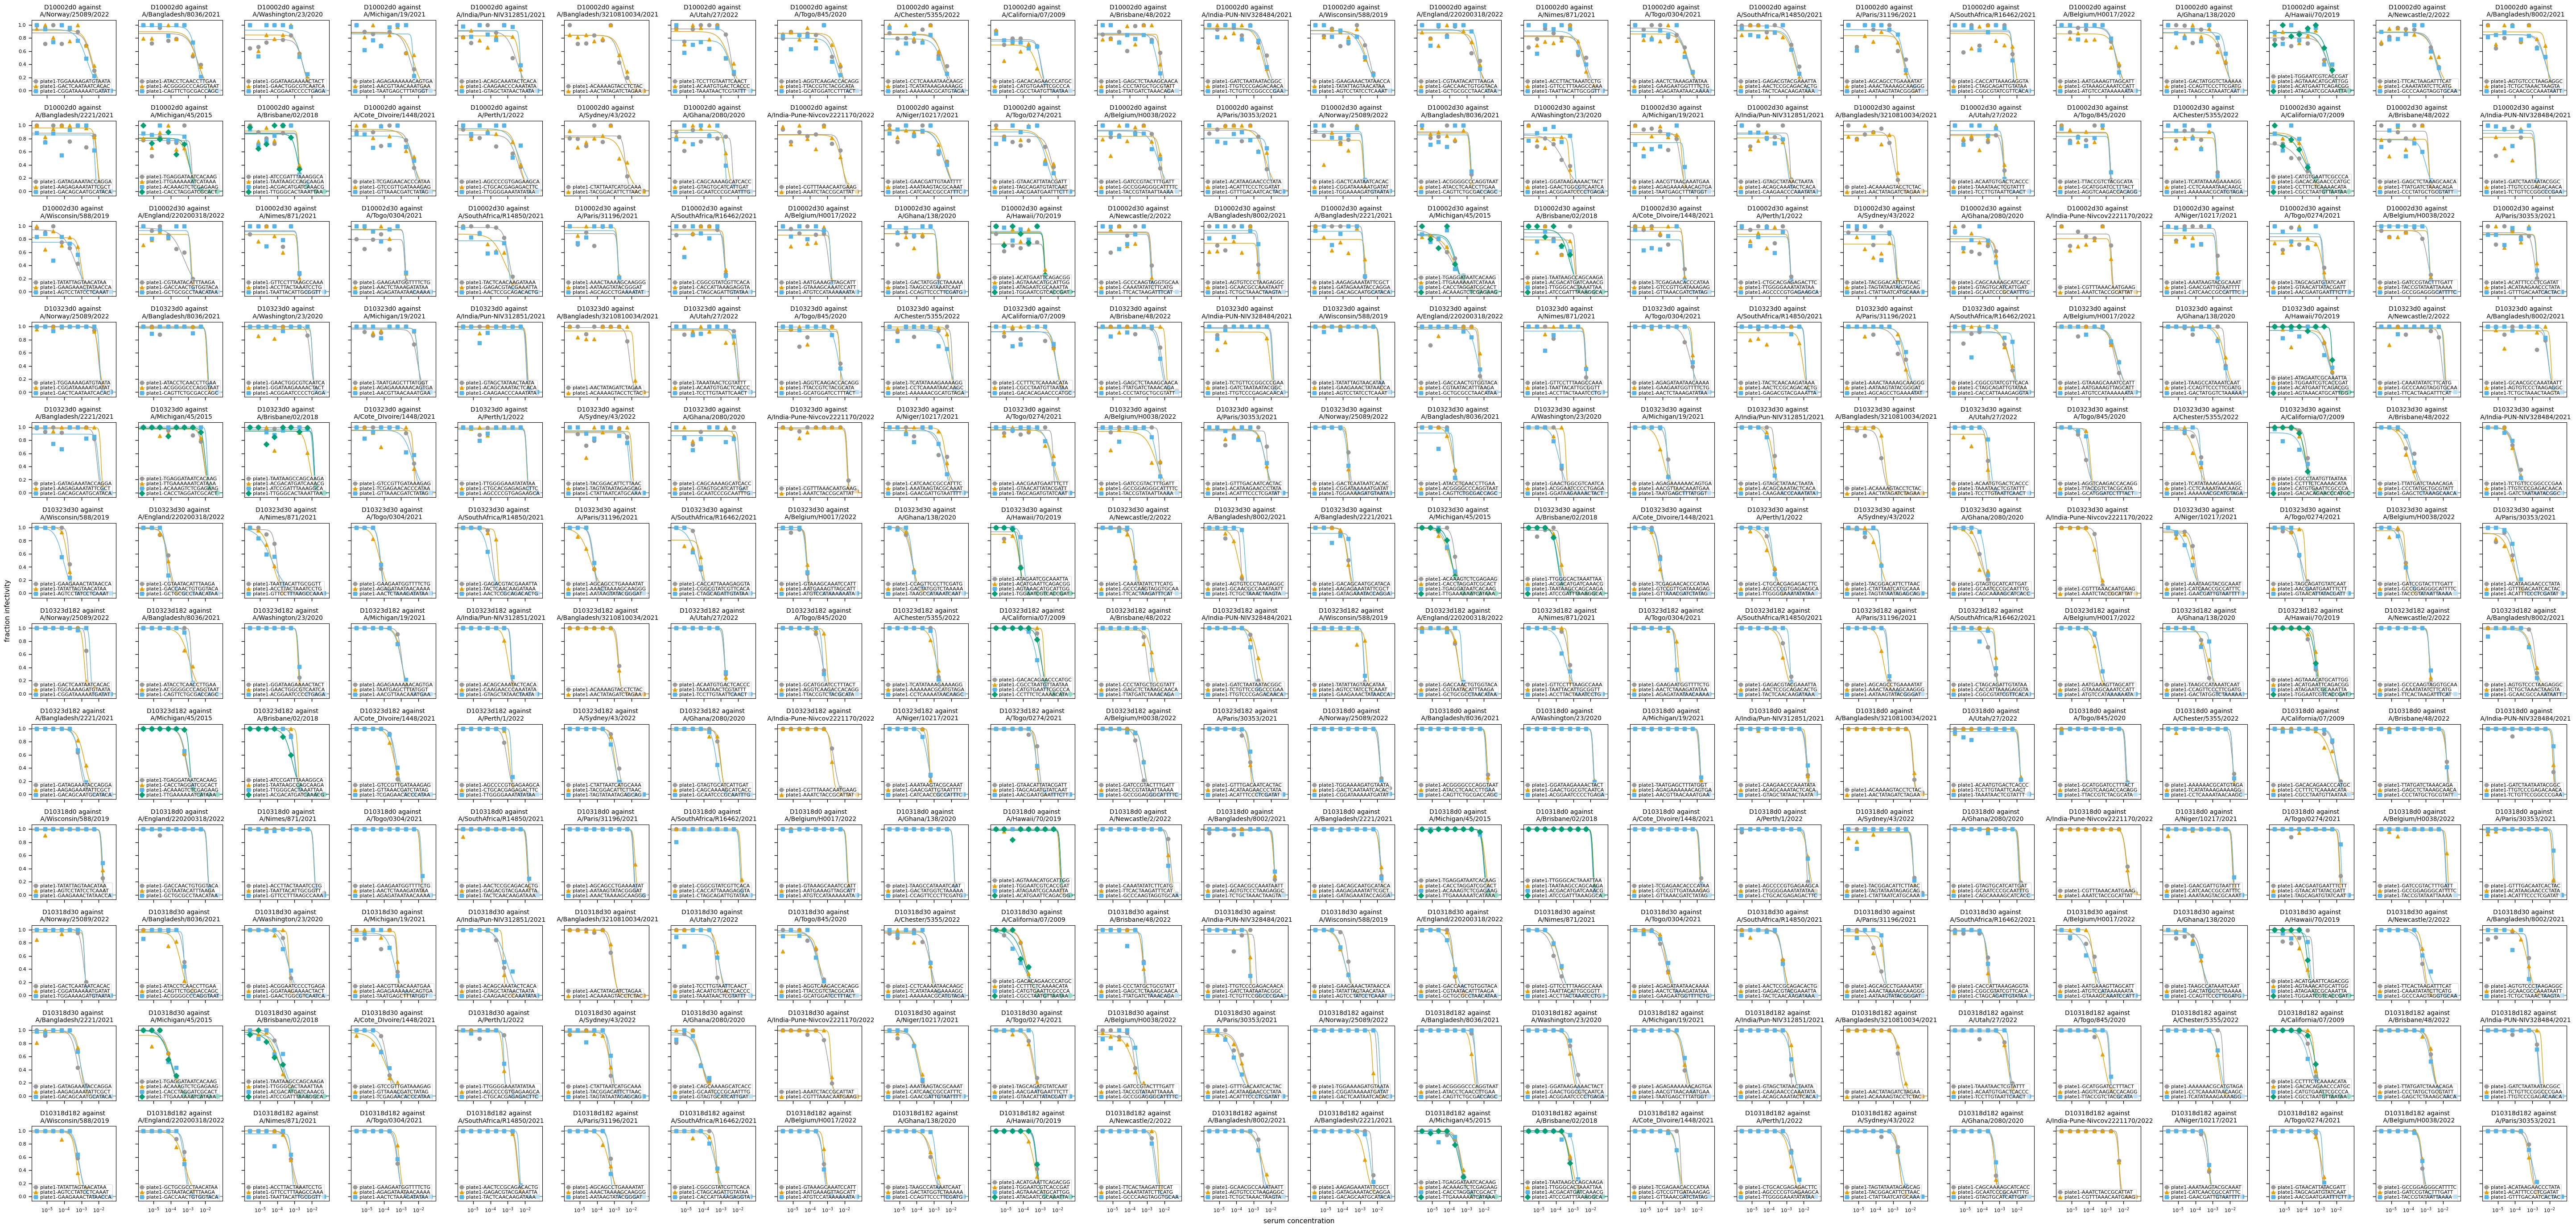

In [31]:
fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10002d0","D10002d30","D10323d0","D10323d30","D10323d182","D10318d0","D10318d30","D10318d182"],
    ncol=24,
    attempt_shared_legend=False,
    titlesize=10,
    labelsize=11,
    ticksize=8,
    legendfontsize=8,
    widthscale=0.8,
    subplot_titles = "{serum} against \n {virus}"
)
fig.savefig("results/plots_for_paper/SupplementalPlate1curves3_forslide.png")

In [ ]:
#Plot all replicates on a single plate (this takes an eon)
fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10002d0","D10002d30","D10323d0","D10323d30","D10323d182","D10318d0","D10318d30","D10318d182"],
    ncol=16,
    attempt_shared_legend=False,
    titlesize=10,
    labelsize=11,
    ticksize=8,
    legendfontsize=8,
    widthscale=0.8,
    subplot_titles = "{serum} against \n {virus}"
)
fig.savefig("results/plots_for_paper/SupplementalPlate1curves3.svg")
#sera=["D10002d0","D10002d30","D10323d0","D10323d30","D10323d182","D10318d0","D10318d30","D10318d182"],

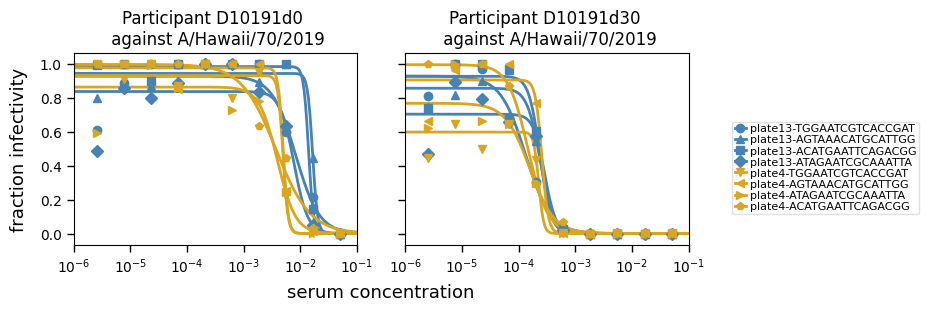

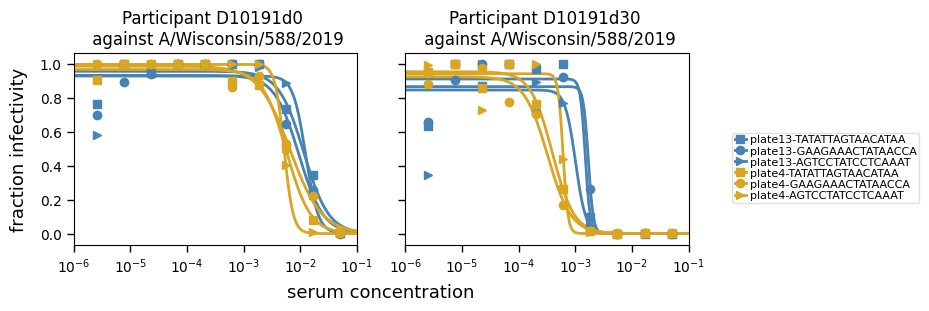

In [32]:
#Plot subset of curves for example figure
fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10191d0", "D10191d30"],
    viruses=["A/Hawaii/70/2019"],
    ncol=3,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    attempt_shared_legend=True,
#    colors=['#9467bd','#9467bd','#9467bd','#9467bd','#17becf','#17becf','#17becf','#17becf'],
    colors=['steelblue','steelblue','steelblue','steelblue','goldenrod','goldenrod','goldenrod','goldenrod'],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1.1,
    heightscale=1.1,
    subplot_titles = "Participant {serum} \n against {virus}",
    linewidth=2
)
fig.savefig("results/plots_for_paper/Fig3_curves2.svg")
fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10191d0","D10191d30"],
    viruses=["A/Wisconsin/588/2019"],
    ncol=3,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    attempt_shared_legend=True,
#    colors=['#9467bd','#9467bd','#9467bd','#9467bd','#17becf','#17becf','#17becf','#17becf'],
    colors=['steelblue','steelblue','steelblue','goldenrod','goldenrod','goldenrod'],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    markers=['s','o','>'],
    widthscale=1.1,
    heightscale=1.1,
    subplot_titles = "Participant {serum} \n against {virus}",
    linewidth=2
)
fig.savefig("results/plots_for_paper/Fig3_curves1.svg")

In [33]:
#Make a dataframe with just the sera and strains that were validated by GFP assay
listofvalidations = ['D10378d0','D10378d182','D10366d0','D10366d182','D10175d0','D10175d182','D10066d0','D10066d182']
validatedviruses = ["A/Hawaii/70/2019", "A/Wisconsin/588/2019","A/England/220200318/2022"]
NGSNeuttiters_validated = ngsneuttiters.loc[ngsneuttiters['serum'].isin(listofvalidations)]
NGSNeuttiters_validated = NGSNeuttiters_validated.loc[NGSNeuttiters_validated['virus'].isin(validatedviruses)]
NGSNeuttiters_validated

serum                     virus    titer   titer_bound  titer_sem  \
623     D10066d0  A/England/220200318/2022    189.5  interpolated      19.48   
626     D10066d0          A/Hawaii/70/2019    151.0  interpolated      15.49   
647     D10066d0      A/Wisconsin/588/2019    162.8  interpolated      36.64   
659   D10066d182  A/England/220200318/2022   4293.0  interpolated    1540.00   
662   D10066d182          A/Hawaii/70/2019   3605.0  interpolated     687.80   
683   D10066d182      A/Wisconsin/588/2019  12590.0  interpolated    1701.00   
1019    D10175d0  A/England/220200318/2022   1599.0  interpolated      40.47   
1022    D10175d0          A/Hawaii/70/2019  10100.0  interpolated    2047.00   
1043    D10175d0      A/Wisconsin/588/2019   1739.0  interpolated      74.91   
1055  D10175d182  A/England/220200318/2022   3128.0  interpolated     476.90   
1058  D10175d182          A/Hawaii/70/2019  14350.0  interpolated    2008.00   
1079  D10175d182      A/Wisconsin/588/2019  10570.0  interpolated    1595.00   
2350    D10366d0  A/England/220200318/2022   2992.0  interpolated     567.10   
2353    D10366d0          A/Hawaii/70/2019   3407.0  interpolated    1270.00   
2374    D10366d0      A/Wisconsin/588/2019    854.7  interpolated     148.30   
2386  D10366d182  A/England/220200318/2022   2244.0  interpolated     518.50   
2389  D10366d182          A/Hawaii/70/2019   3955.0  interpolated     645.40   
2410  D10366d182      A/Wisconsin/588/2019    878.1  interpolated     171.90   
2458    D10378d0  A/England/220200318/2022    187.6  interpolated      14.71   
2461    D10378d0          A/Hawaii/70/2019    611.2  interpolated      19.87   
2482    D10378d0      A/Wisconsin/588/2019    437.1  interpolated     101.90   
2494  D10378d182  A/England/220200318/2022    362.4  interpolated      60.38   
2497  D10378d182          A/Hawaii/70/2019   5288.0  interpolated     701.60   
2518  D10378d182      A/Wisconsin/588/2019   5627.0  interpolated    1175.00   

      n_replicates  titer_as  
623              3  midpoint  
626              4  midpoint  
647              3  midpoint  
659              3  midpoint  
662              4  midpoint  
683              3  midpoint  
1019             3  midpoint  
1022             4  midpoint  
1043             3  midpoint  
1055             3  midpoint  
1058             4  midpoint  
1079             3  midpoint  
2350             3  midpoint  
2353             4  midpoint  
2374             3  midpoint  
2386             3  midpoint  
2389             4  midpoint  
2410             3  midpoint  
2458             3  midpoint  
2461             4  midpoint  
2482             3  midpoint  
2494             3  midpoint  
2497             4  midpoint  
2518             3  midpoint

In [34]:
# We named these with a different format in the GFP file, need to make a list of names that can be reconciled
serumnames = NGSNeuttiters_validated['serum'].tolist()
mapped_names = {}
for i in serumnames:
    indiv = i[0:6]
    day= i[7:]
    rename = indiv + "_day" + day
    mapped_names[i] = rename
NGSNeuttiters_validated['serum_rename'] = NGSNeuttiters_validated['serum'].map(mapped_names)
NGSNeuttiters_validated = NGSNeuttiters_validated.drop(columns=['n_replicates','titer_sem','titer_bound']).rename(columns={"nt50": "nt50_seqneut","serum_rename": "serum_GFPname"})
NGSNeuttiters_validated

serum                     virus    titer  titer_as  serum_GFPname
623     D10066d0  A/England/220200318/2022    189.5  midpoint    D10066_day0
626     D10066d0          A/Hawaii/70/2019    151.0  midpoint    D10066_day0
647     D10066d0      A/Wisconsin/588/2019    162.8  midpoint    D10066_day0
659   D10066d182  A/England/220200318/2022   4293.0  midpoint  D10066_day182
662   D10066d182          A/Hawaii/70/2019   3605.0  midpoint  D10066_day182
683   D10066d182      A/Wisconsin/588/2019  12590.0  midpoint  D10066_day182
1019    D10175d0  A/England/220200318/2022   1599.0  midpoint    D10175_day0
1022    D10175d0          A/Hawaii/70/2019  10100.0  midpoint    D10175_day0
1043    D10175d0      A/Wisconsin/588/2019   1739.0  midpoint    D10175_day0
1055  D10175d182  A/England/220200318/2022   3128.0  midpoint  D10175_day182
1058  D10175d182          A/Hawaii/70/2019  14350.0  midpoint  D10175_day182
1079  D10175d182      A/Wisconsin/588/2019  10570.0  midpoint  D10175_day182
2350    D10366d0  A/England/220200318/2022   2992.0  midpoint    D10366_day0
2353    D10366d0          A/Hawaii/70/2019   3407.0  midpoint    D10366_day0
2374    D10366d0      A/Wisconsin/588/2019    854.7  midpoint    D10366_day0
2386  D10366d182  A/England/220200318/2022   2244.0  midpoint  D10366_day182
2389  D10366d182          A/Hawaii/70/2019   3955.0  midpoint  D10366_day182
2410  D10366d182      A/Wisconsin/588/2019    878.1  midpoint  D10366_day182
2458    D10378d0  A/England/220200318/2022    187.6  midpoint    D10378_day0
2461    D10378d0          A/Hawaii/70/2019    611.2  midpoint    D10378_day0
2482    D10378d0      A/Wisconsin/588/2019    437.1  midpoint    D10378_day0
2494  D10378d182  A/England/220200318/2022    362.4  midpoint  D10378_day182
2497  D10378d182          A/Hawaii/70/2019   5288.0  midpoint  D10378_day182
2518  D10378d182      A/Wisconsin/588/2019   5627.0  midpoint  D10378_day182

In [35]:
#Calculate NT50 for traditional neut assay and drop unused columns
fitsdf = fits_traditionalneut.fitParams()
fitsdf["Reciprocal_ic50"] = 1/fitsdf['ic50']

GFPneuts = fitsdf.loc[fitsdf['ic50_bound'] == 'interpolated']
GFPneuts = GFPneuts.drop(columns=['replicate','ic50_str','midpoint','slope','top','bottom','nreplicates','ic50_bound']).rename(columns={"Reciprocal_ic50": "nt50_GFPneut","serum":"serum_GFPname"})

/fh/fast/bloom_j/computational_notebooks/aloes/2024/flu_seqneut_DRIVE_2021-22_repeat_vax/.snakemake/conda/014bd9b36c34fcb424454141f9c8f5d9_/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/computational_notebooks/aloes/2024/flu_seqneut_DRIVE_2021-22_repeat_vax/.snakemake/conda/014bd9b36c34fcb424454141f9c8f5d9_/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/computational_notebooks/aloes/2024/flu_seqneut_DRIVE_2021-22_repeat_vax/.snakemake/conda/014bd9b36c34fcb424454141f9c8f5d9_/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


In [36]:
#Merge GFP neuts file and NGS neuts file
mergeddf = GFPneuts.merge(NGSNeuttiters_validated,on=['serum_GFPname','virus'])
mergeddf

serum_GFPname                     virus      ic50  midpoint_bound  \
0   D10066_day182          A/Hawaii/70/2019  0.000356        0.000355   
1   D10066_day182      A/Wisconsin/588/2019  0.000192        0.000192   
2   D10066_day182  A/England/220200318/2022  0.000597        0.000603   
3     D10175_day0          A/Hawaii/70/2019  0.000075        0.000075   
4     D10175_day0      A/Wisconsin/588/2019  0.000237        0.000237   
5     D10175_day0  A/England/220200318/2022  0.000468        0.000489   
6   D10175_day182          A/Hawaii/70/2019  0.000059        0.000059   
7   D10175_day182      A/Wisconsin/588/2019  0.000074        0.000074   
8   D10175_day182  A/England/220200318/2022  0.000597        0.000602   
9     D10366_day0          A/Hawaii/70/2019  0.000220        0.000224   
10    D10366_day0      A/Wisconsin/588/2019  0.001741        0.001744   
11    D10366_day0  A/England/220200318/2022  0.000496        0.000516   
12  D10366_day182          A/Hawaii/70/2019  0.000323        0.000330   
13  D10366_day182      A/Wisconsin/588/2019  0.001711        0.001719   
14  D10366_day182  A/England/220200318/2022  0.000604        0.000611   
15    D10378_day0          A/Hawaii/70/2019  0.002535        0.002568   
16    D10378_day0      A/Wisconsin/588/2019  0.005005        0.005022   
17    D10378_day0  A/England/220200318/2022  0.016485        0.016561   
18  D10378_day182          A/Hawaii/70/2019  0.000197        0.000198   
19  D10378_day182      A/Wisconsin/588/2019  0.000198        0.000199   
20  D10378_day182  A/England/220200318/2022  0.011937        0.012284   

   midpoint_bound_type        r2      rmsd  nt50_GFPneut       serum    titer  \
0         interpolated  0.990066  0.043744   2808.739570  D10066d182   3605.0   
1         interpolated  0.993551  0.035513   5205.459372  D10066d182  12590.0   
2         interpolated  0.937367  0.102768   1675.299228  D10066d182   4293.0   
3         interpolated  0.988447  0.044700  13314.571179    D10175d0  10100.0   
4         interpolated  0.993421  0.036132   4213.408100    D10175d0   1739.0   
5         interpolated  0.957690  0.084697   2136.807908    D10175d0   1599.0   
6         interpolated  0.988676  0.042339  16929.725446  D10175d182  14350.0   
7         interpolated  0.993403  0.033664  13587.191117  D10175d182  10570.0   
8         interpolated  0.967217  0.075210   1676.121665  D10175d182   3128.0   
9         interpolated  0.948976  0.093991   4548.378927    D10366d0   3407.0   
10        interpolated  0.989410  0.043053    574.526604    D10366d0    854.7   
11        interpolated  0.972533  0.069067   2017.150956    D10366d0   2992.0   
12        interpolated  0.978157  0.065349   3093.660746  D10366d182   3955.0   
13        interpolated  0.989198  0.042009    584.584462  D10366d182    878.1   
14        interpolated  0.969343  0.072139   1655.150325  D10366d182   2244.0   
15        interpolated  0.981348  0.052386    394.412732    D10378d0    611.2   
16        interpolated  0.989411  0.034322    199.808497    D10378d0    437.1   
17        interpolated  0.845071  0.072002     60.662090    D10378d0    187.6   
18        interpolated  0.978378  0.062249   5087.081732  D10378d182   5288.0   
19        interpolated  0.989910  0.043572   5049.878795  D10378d182   5627.0   
20        interpolated  0.915312  0.074946     83.775032  D10378d182    362.4   

    titer_as  
0   midpoint  
1   midpoint  
2   midpoint  
3   midpoint  
4   midpoint  
5   midpoint  
6   midpoint  
7   midpoint  
8   midpoint  
9   midpoint  
10  midpoint  
11  midpoint  
12  midpoint  
13  midpoint  
14  midpoint  
15  midpoint  
16  midpoint  
17  midpoint  
18  midpoint  
19  midpoint  
20  midpoint

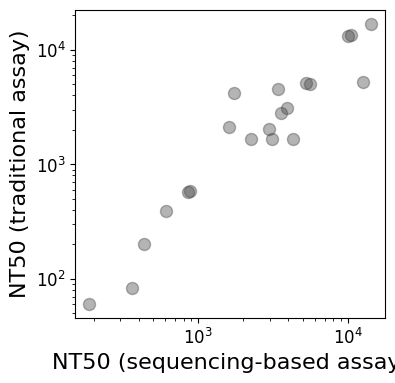

In [37]:
#Create a correlation plot and calculate the Pearson correlation
correlation = mergeddf.plot.scatter(y='nt50_GFPneut',x='titer',loglog=True,c='#444444',s=75, ylabel='NT50 (traditional assay)', xlabel="NT50 (sequencing-based assay)", fontsize=12,figsize=(4,4), alpha=0.4)
correlation.set_ylabel('NT50 (traditional assay)',fontdict= {'fontsize':16})
correlation.set_xlabel('NT50 (sequencing-based assay)',fontdict= {'fontsize':16})

correlation.figure.savefig("results/plots_for_paper/Fig4_correlation.svg")
mergeddf.corr(method="pearson",numeric_only=True)
##to be removed
correlation.figure.savefig("results/plots_for_paper/plot_specific_sera/curves.pdf")

In [38]:
#Create a column that just contains the day sampled
mergeddf['timepoint'] = mergeddf['serum'].str[7:]

In [39]:
#Create a plot of correlation colored by collection day
alt.Chart(mergeddf).mark_point(filled=True, size=75).encode( 
    x=alt.X('titer', scale=alt.Scale(type="log", domain=[40,40000], nice=False),axis=alt.Axis(title="NT50 (Sequencing-based Assay)")), 
    y=alt.Y('nt50_GFPneut', scale=alt.Scale(type="log", domain=[40,40000], nice=False),axis=alt.Axis(title="NT50 (Traditional Assay)")),
    color =alt.Color('timepoint:N', sort=['0','182'], title="days post vaccination",legend=alt.Legend(orient='right',labelLimit= 0)).scale(range = ['rebeccapurple', 'mediumseagreen']),
).properties(width = 250, height = 250).configure_axis(grid=False, domain=False,labelFontSize=14,titleFontSize=20).configure_legend(titleAlign='left',labelLimit= 0,
titleFontSize=15,
labelFontSize=16
)

alt.Chart(...)

In [40]:
#Create file with fit parameters
fitsdfseqneut = fits_seqbasedneut.fitParams(no_average=True, average_only=False)

In [41]:
#Make a list of sera for which we have replicates
replicates = ['D10159','D10042','D10041','D10256','D10366','D10191']

In [42]:
#Pull data for sera with replicates from dataframe
sera_withreps = fitsdfseqneut.loc[fitsdfseqneut['serum'].str.contains('D10042|D10041|D10191|D10159|D10256|D10396')]

In [43]:
#Split replicates into separate dataframes
sera_with_rep1 = sera_withreps.loc[~sera_withreps['replicate'].str.contains('plate13|plate11')].drop(columns = ['nreplicates','ic50','ic50_bound','ic50_str','midpoint_bound','midpoint_bound_type','top','bottom','r2'])
sera_with_rep2 = sera_withreps.loc[sera_withreps['replicate'].str.contains('plate13|plate11')].drop(columns = ['nreplicates','ic50','ic50_bound','ic50_str','midpoint_bound','midpoint_bound_type','top','bottom','r2'])

In [44]:
#Label columns so that these can be merged and plotted
sera_with_rep1['NT50_rep1'] = 1/sera_with_rep1['midpoint']
sera_with_rep2['NT50_rep2'] = 1/sera_with_rep2['midpoint']
sera_with_rep1['barcode'] = sera_with_rep1['replicate'].str.split("-").str[1]
sera_with_rep2['NT50_rep2'] = 1/sera_with_rep2['midpoint']
sera_with_rep2['barcode'] = sera_with_rep2['replicate'].str.split("-").str[1]


merged_replicates = sera_with_rep1.merge(sera_with_rep2, on=['serum','virus','barcode'])

In [45]:
#Rename merged directory and calculate median
merged_replicates_withbarcodes = merged_replicates
merged_replicates = merged_replicates.drop(columns=['replicate_x','replicate_y','barcode'])
merged_replicates = merged_replicates.groupby(['serum','virus']).median().reset_index()
merged_replicates

serum                         virus  midpoint_x    slope_x    rmsd_x  \
0     D10041d0        A/Bangladesh/2221/2021    0.004666   2.188542  0.056537   
1     D10041d0  A/Bangladesh/3210810034/2021    0.004139   6.185280  0.061255   
2     D10041d0        A/Bangladesh/8002/2021    0.006443   2.963878  0.037994   
3     D10041d0        A/Bangladesh/8036/2021    0.003428   2.329180  0.040218   
4     D10041d0          A/Belgium/H0017/2022    0.001796  10.000000  0.077559   
..         ...                           ...         ...        ...       ...   
519  D10396d30              A/Togo/0304/2021    0.000438   2.547100  0.122540   
520  D10396d30               A/Togo/845/2020    0.000985   1.707692  0.140046   
521  D10396d30                A/Utah/27/2022    0.000444   1.512136  0.114334   
522  D10396d30          A/Washington/23/2020    0.000182  10.000000  0.070869   
523  D10396d30          A/Wisconsin/588/2019    0.000195   5.678404  0.096841   

       NT50_rep1  midpoint_y   slope_y    rmsd_y    NT50_rep2  
0     214.298962    0.005263  4.886524  0.115616   190.005958  
1     252.709829    0.005204  5.908277  0.089621   192.149192  
2     155.207763    0.010228  9.998421  0.099961    97.769446  
3     299.211935    0.003895  6.663393  0.099491   273.327284  
4     556.641099    0.002214  3.308248  0.074782   451.615599  
..           ...         ...       ...       ...          ...  
519  2281.532537    0.001232  4.003444  0.093705   811.449968  
520  1014.995178    0.001996  3.349405  0.076013   500.946790  
521  2363.629819    0.001128  3.765025  0.050567   890.055632  
522  5502.666150    0.000155  1.977613  0.036056  6431.899346  
523  5143.840904    0.000336  3.113921  0.061444  2997.643552  

[524 rows x 10 columns]

<Axes: xlabel='NT50 (replicate 1, by strain)', ylabel='NT50 (replicate 2, by strain)'>

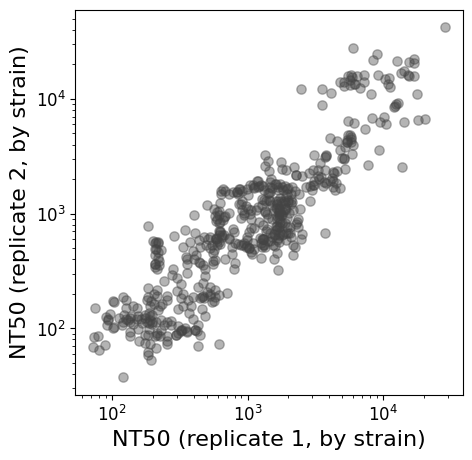

In [46]:
#Plot correlation by strain
merged_rep_filtered = merged_replicates.loc[merged_replicates['serum'].str.contains('D10191')]
correlation = merged_replicates.plot.scatter(x='NT50_rep1',y='NT50_rep2',loglog=True,c='#444444',s=45, xlabel='NT50 (replicate 1)', ylabel="NT50 (replicate 2)", fontsize=12,figsize=(5,5), alpha=0.4)
correlation.set_xlabel('NT50 (replicate 1, by strain)',fontdict= {'fontsize':16})
correlation.set_ylabel('NT50 (replicate 2, by strain)',fontdict= {'fontsize':16})
correlation

<Axes: xlabel='NT50 (replicate 1, by barcode)', ylabel='NT50 (replicate 2, by barcode)'>

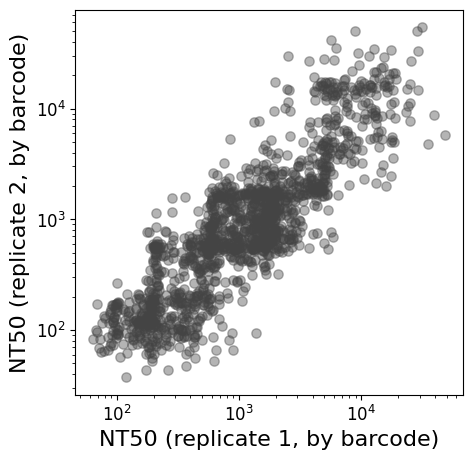

In [47]:
#Plot correlation by barcode
merged_replicates_withbarcodes_filtered = merged_replicates_withbarcodes.loc[merged_replicates_withbarcodes['serum'].str.contains('D10191')]
correlation = merged_replicates_withbarcodes.plot.scatter(x='NT50_rep1',y='NT50_rep2',loglog=True,c='#444444',s=45, xlabel='NT50 (replicate 1)', ylabel="NT50 (replicate 2)", fontsize=12,figsize=(5,5), alpha=0.4)
correlation.set_xlabel('NT50 (replicate 1, by barcode)',fontdict= {'fontsize':16})
correlation.set_ylabel('NT50 (replicate 2, by barcode)',fontdict= {'fontsize':16})
correlation

In [48]:
#Add columns for naming samples and days
merged_replicates_withbarcodes['individual'] = "Participant " + merged_replicates_withbarcodes['serum'].str[0:6]
merged_replicates_withbarcodes['day'] = "Day " + merged_replicates_withbarcodes['serum'].str[7:]

merged_replicates['individual'] = "Participant " + merged_replicates['serum'].str[0:6]
merged_replicates['day'] = "Day " + merged_replicates['serum'].str[7:]

In [49]:
#Make plot showing correlation for samples run on same plate, both plates with replicates
alt.Chart(merged_replicates_withbarcodes).mark_point(filled=True).encode( 
    x=alt.X('NT50_rep1', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, replicate 1")), 
    y=alt.Y('NT50_rep2', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, replicate 2")),
    color =alt.Color('day:N', sort=['d0','d30','d182'], title="days post vaccination",legend=alt.Legend(orient='right',labelLimit= 0)).scale(range = ['rebeccapurple', 'mediumseagreen', 'firebrick']),
    facet=alt.Facet(
    "individual:N",
    header=alt.Header(
        labelFontSize=16, labelFontStyle="bold", labelPadding=0, title="Correlation in NT50s for barcodes for the same strain within the same plate", titleFontSize=24
    ),
    spacing=3,
    columns=3,
            )
).properties(width = 200, height = 200).configure_axis(grid=False, domain=False,labelFontSize=12,titleFontSize=16).configure_legend(titleAlign='left',labelLimit= 0,
titleFontSize=15,
labelFontSize=15
)

alt.Chart(...)

In [50]:
#Make a dataframe where the first and second barcodes can be compared for each strain, first make dictionary and then add as column to plate
D10396 = merged_replicates_withbarcodes.loc[merged_replicates_withbarcodes['individual'] == "Participant D10396"]
D10396 = D10396.loc[D10396['replicate_x'].str.contains('plate8')]
D10396 = D10396[['serum', 'virus', 'replicate_x','NT50_rep1']].copy()
#D10396_pivot = D10396.pivot(index='replicate_x',columns='virus')
D10396_dict = dict(zip(D10396['replicate_x'],D10396['virus']))

strain_dict = {}
replicate_mapping = {}
for i in D10396_dict:
    barcode = i
    strain = D10396_dict[i]
    if strain not in strain_dict:
        strain_dict[strain] = []
        strain_dict[strain].append(barcode)
        replicate_mapping[barcode] = 'bar1'
    else:
        if len(strain_dict[strain]) < 2:
            strain_dict[strain].append(barcode)
            replicate_mapping[barcode] = 'bar2'
D10396['replicate_barcode'] = D10396['replicate_x'].map(replicate_mapping)
D10396.dropna()

D10396_pivot = D10396.dropna().pivot(columns='replicate_barcode',values='NT50_rep1',index=['virus','serum']).reset_index()
D10396_pivot

replicate_barcode                         virus      serum         bar1  \
0                        A/Bangladesh/2221/2021  D10396d30  1987.233573   
1                  A/Bangladesh/3210810034/2021   D10396d0   189.854817   
2                  A/Bangladesh/3210810034/2021  D10396d30  1827.554680   
3                        A/Bangladesh/8002/2021  D10396d30  1672.449834   
4                        A/Bangladesh/8036/2021   D10396d0   185.970507   
..                                          ...        ...          ...   
63                               A/Utah/27/2022   D10396d0   389.370287   
64                               A/Utah/27/2022  D10396d30  1855.728451   
65                         A/Washington/23/2020  D10396d30  5283.590407   
66                         A/Wisconsin/588/2019   D10396d0   270.523721   
67                         A/Wisconsin/588/2019  D10396d30  4789.215999   

replicate_barcode         bar2  
0                  1531.374122  
1                   350.296997  
2                  1866.040739  
3                  4965.304563  
4                   154.484764  
..                         ...  
63                  834.161406  
64                 2871.531186  
65                 7170.117899  
66                  343.918739  
67                         NaN  

[68 rows x 4 columns]

In [51]:
#Make a dataframe where the first and second barcodes can be compared for each strain, first make dictionary and then add as column to plate
plate13 = merged_replicates_withbarcodes.loc[merged_replicates_withbarcodes['replicate_y'].str.contains("plate13")]
plate13 = plate13[['serum', 'virus', 'replicate_y','NT50_rep1','individual','day']].copy()
#D10396_pivot = D10396.pivot(index='replicate_x',columns='virus')
plate13_dict = dict(zip(plate13['replicate_y'],plate13['virus']))

strain_dict = {}
replicate_mapping = {}
for i in plate13_dict:
    barcode = i
    strain = plate13_dict[i]
    if strain not in strain_dict:
        strain_dict[strain] = []
        strain_dict[strain].append(barcode)
        replicate_mapping[barcode] = 'bar1'
    else:
        if len(strain_dict[strain]) < 2:
            strain_dict[strain].append(barcode)
            replicate_mapping[barcode] = 'bar2'
plate13['replicate_barcode'] = plate13['replicate_y'].map(replicate_mapping)
plate13.dropna()

plate13_pivot = plate13.dropna().pivot(columns='replicate_barcode',values='NT50_rep1',index=['virus','serum','individual','day']).reset_index()

In [52]:
#Make a plot showing correlation in barcodes for all people on the same plate
alt.Chart(plate13_pivot).mark_point(filled=True).encode(
    alt.X(alt.repeat("column"), type='quantitative', scale=alt.Scale(type="log")),
    alt.Y(alt.repeat("row"), type='quantitative', scale=alt.Scale(type="log")),
    color='serum:N'
).properties(
    width=300,
    height=300
).repeat(
    row=['bar1'],
    column=['bar2']
).interactive().configure_axis(grid=False, domain=True)

alt.RepeatChart(...)

In [53]:
alt.Chart(plate13_pivot).mark_point(filled=True).encode( 
    x=alt.X('bar1', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, barcode 1")), 
    y=alt.Y('bar2', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, barcode 2")),
    color =alt.Color('day:N', sort=['d0','d30','d182'], title="days post vaccination",legend=alt.Legend(orient='right',labelLimit= 0)).scale(range = ['rebeccapurple', 'mediumseagreen', 'firebrick']),
    opacity=alt.value(0.5),
    size=alt.value(55),
    facet=alt.Facet(
    "individual:N",
    header=alt.Header(
        labelFontSize=16, labelFontStyle="bold", labelPadding=0, title="Correlation in NT50s for replicate barcodes within the same plate", titleFontSize=20
    ),
    spacing=3,
    columns=3,
            )
).properties(width = 200, height = 200).configure_axis(grid=False, domain=False,labelFontSize=14,titleFontSize=16).configure_legend(titleAlign='left',labelLimit= 0,
titleFontSize=15,
labelFontSize=15
)

alt.Chart(...)

In [54]:
#Check correlations for each person on plate
serum = plate13_pivot['individual'].unique().tolist()
for i in serum:
    test=plate13_pivot.loc[plate13_pivot['individual'] == i].corr(method="pearson", numeric_only=True)
    print(i, test)

Participant D10042 replicate_barcode     bar1     bar2
replicate_barcode                  
bar1               1.00000  0.79321
bar2               0.79321  1.00000
Participant D10191 replicate_barcode      bar1      bar2
replicate_barcode                    
bar1               1.000000  0.908872
bar2               0.908872  1.000000
Participant D10396 replicate_barcode      bar1      bar2
replicate_barcode                    
bar1               1.000000  0.842108
bar2               0.842108  1.000000


In [55]:
#Make correlation plot for plates run on separate days
alt.Chart(merged_replicates.loc[merged_replicates['individual'].str.contains('D10042|D10191|D10396')]).mark_point(filled=True).encode( 
    x=alt.X('NT50_rep1', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, plate A")), 
    y=alt.Y('NT50_rep2', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, plate B")),
    color =alt.Color('day:N', sort=['Day 0','Day 30',' Day 182'], title="days post vaccination",legend=alt.Legend(orient='right',labelLimit= 0)).scale(range = ['rebeccapurple', 'firebrick', 'mediumseagreen']),
    opacity=alt.value(0.5),
    size=alt.value(55),
    facet=alt.Facet(
    "individual:N",
    header=alt.Header(
        labelFontSize=16, labelFontStyle="bold", labelPadding=0, title="Correlation in NT50s for each strain between plates run on different days", titleFontSize=20
    ),
    spacing=3,
    columns=3,
            )
).properties(width = 200, height = 200).configure_axis(grid=False, domain=False,labelFontSize=14,titleFontSize=16).configure_legend(titleAlign='left',labelLimit= 0,
titleFontSize=15,
labelFontSize=15
)

alt.Chart(...)

In [56]:
#Look at correlations for plots above
for i in serum:
    test=merged_replicates.loc[merged_replicates['individual'] == i].drop(columns = ['midpoint_x','midpoint_y','slope_x','slope_y']).corr(method="pearson", numeric_only=True)
    print(i, test)

Participant D10042              rmsd_x  NT50_rep1    rmsd_y  NT50_rep2
rmsd_x     1.000000  -0.000310 -0.326466  -0.095049
NT50_rep1 -0.000310   1.000000 -0.354024   0.863184
rmsd_y    -0.326466  -0.354024  1.000000  -0.282626
NT50_rep2 -0.095049   0.863184 -0.282626   1.000000
Participant D10191              rmsd_x  NT50_rep1    rmsd_y  NT50_rep2
rmsd_x     1.000000  -0.245247 -0.146236  -0.194813
NT50_rep1 -0.245247   1.000000 -0.114503   0.908741
rmsd_y    -0.146236  -0.114503  1.000000  -0.204711
NT50_rep2 -0.194813   0.908741 -0.204711   1.000000
Participant D10396              rmsd_x  NT50_rep1    rmsd_y  NT50_rep2
rmsd_x     1.000000  -0.358625  0.259616  -0.347947
NT50_rep1 -0.358625   1.000000 -0.490517   0.979850
rmsd_y     0.259616  -0.490517  1.000000  -0.420674
NT50_rep2 -0.347947   0.979850 -0.420674   1.000000
